In [1]:
%run C:\Users\HSS\dd.py

In [2]:
print('done')

done


## 데이터의 분포를 표현하는 방법 : 기술통계
- 표본평균, 표본최빈값, 표본중앙값
- 표본분산, 표본표준편차
- 표본왜도, 표본첨도

In [4]:
np.random.seed(0)
x = np.random.normal(size = 21)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982])

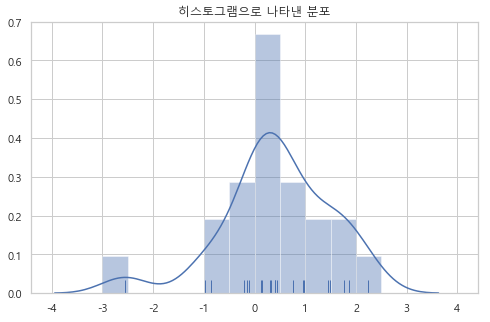

In [8]:
bins = np.linspace(-4,4,17)
plt.figure(figsize = (8,5))
sns.distplot(x, bins = bins, rug = True)
plt.title('히스토그램으로 나타낸 분포')
plt.show()

In [11]:
print('표본평균: {}과 표본중앙값: {}'.format(round(np.mean(x),2), round(np.median(x),2)))

표본평균: 0.42과 표본중앙값: 0.4


In [17]:
ns, edge = np.histogram(x,bins)
print('hist ', ns)
print('bin: ',bins)
print('edge: ', edge)

print(len(ns),len(edge))

hist  [0 0 1 0 0 0 2 3 7 3 2 2 1 0 0 0]
bin:  [-4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5
  3.   3.5  4. ]
edge:  [-4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5
  3.   3.5  4. ]
16 17


In [22]:
#표본이 가장 많은 구간
print(ns)

#최대값 
print(np.max(ns))

#최대값 인덱스
print(np.argmax(ns)) 

#최빈구간
print(bins[np.argmax(ns):np.argmax(ns)+2])

[0 0 1 0 0 0 2 3 7 3 2 2 1 0 0 0]
7
8
[0.  0.5]


### 자투리 : 구간마다 새로운 라벨을 지정하고 싶을 떄
- `pd.cut(data, bins, labels)`


In [56]:
x1 = pd.DataFrame(x)
x1.columns = ['data']

In [61]:
x1['category'] = pd.cut(x1['data'],[-3,-1,0,2,3], labels = ['low','ok','high','omg'])

In [62]:
x1.head(7)

,data,category
0,1.764052,high
1,0.400157,high
2,0.978738,high
3,2.240893,omg
4,1.867558,high
5,-0.977278,ok
6,0.950088,high


In [64]:
x1.columns

Index(['data', 'category'], dtype='object')

### 연습문제7.1.1
#### 붓꽃의 꽃잎 길이(petal length)를 구하고 히스토그램을 그려라

In [71]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [91]:
sp = pd.Series(iris.target, dtype = 'category')
sp = sp.cat.rename_categories(iris.target_names)
sp
df['species'] = sp
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [99]:
length = df.iloc[:,[2,4]]
length.head()

,petal length (cm),species
0,1.4,setosa
1,1.4,setosa
2,1.3,setosa
3,1.5,setosa
4,1.4,setosa


(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <a list of 10 Patch objects>)

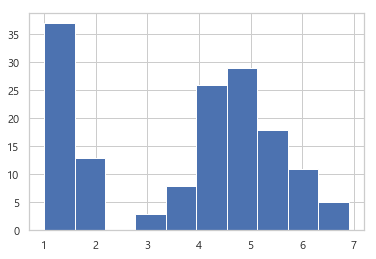

In [109]:
plt.plot(figsize = (15,6))
plt.hist(length.iloc[:,0])

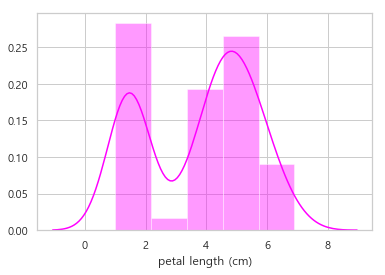

In [128]:
sns.distplot(length.iloc[:,0] , color= 'magenta')

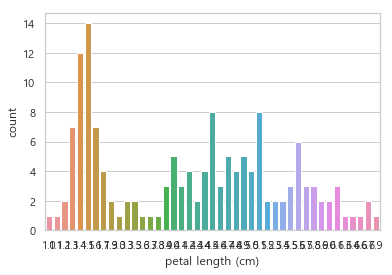

In [136]:
sns.countplot(length.iloc[:,0]) #모든 길이에 대해서 count인.. 색은 이쁘네
#길이 분포의 봉이 여러개다. 즉 1개 이상의 분포가 섞여있을 확률이 높다.

### setosa만 분리해서 distplot

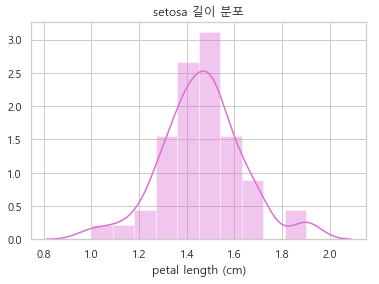

In [139]:
#setosa만 분리했을 떄 봉은 단봉
plt.title('setosa 길이 분포')
sns.distplot(length['petal length (cm)'][length['species']=='setosa'], color = 'orchid')
plt.show()

In [142]:
import scipy as sp

In [149]:
sp.random.seed(0)
x = sp.stats.norm(0,2).rvs(1000) #1000개, m =0 , s = 2

In [147]:
x = sp.stats.norm(0,2).rvs(1)

In [150]:
np.random.normal(0,2,1000)

array([ 1.11192536e+00,  1.78494777e+00, -8.44629648e-01,  2.09428059e-01,
        4.56106650e-01,  4.02959893e-01,  1.08154717e+00, -3.63615526e+00,
       -9.86481403e-02,  4.78067202e-01, -2.00066070e+00,  3.34797141e+00,
        3.23118534e-01,  3.12680949e+00, -1.58104604e+00, -1.81460024e+00,
        4.48504442e-01, -3.35737673e+00,  4.29931181e-01,  1.94438464e-01,
        2.03133056e+00,  1.40208268e+00, -8.34954700e-01, -2.19499331e+00,
        3.42461044e+00, -1.58423004e+00, -2.09104911e+00, -2.16971212e+00,
        2.23461063e+00, -1.03780041e+00, -1.50740893e+00,  2.75379652e-01,
       -4.13889421e-01, -1.35619092e+00,  1.50798293e+00,  2.13063098e+00,
        1.97063502e+00,  1.53383934e+00,  8.05251062e-01, -3.55177600e+00,
        3.33850161e+00,  6.03978421e-01,  1.21631286e+00,  2.22992465e+00,
        2.86670501e+00,  8.36796023e-01,  8.71092319e-01, -1.19844855e+00,
        6.61795023e-02, -1.70832252e+00, -1.43988106e+00, -1.78714880e+00,
       -3.12047782e-01,  

In [221]:
def sample_statistics(x, n, x_min=0, x_max = 10):
    bins = np.linspace(x_min, x_max, n+1)
    ns, _ = np.histogram(x, bins = bins)
    
    sample_mean = np.mean(x)
    sample_median = np.median(x)
    mode_idx = np.argmax(ns)
    sample_mode = 0.5* (bins[mode_idx] +  bins[mode_idx+1])
    
    print('구간이 {}개일 때'.format(n))
    print('표본 평균이 {}'.format(sample_mean))
    print('표본 중앙값이 {}'.format(sample_median))
    print('표본 최빈값이 {}'.format(sample_mode))
    
    
    sns.distplot(x,bins = bins)
    plt.axvline(sample_mean, c = 'k', ls = ':', label = '표본평균')
    plt.axvline(sample_median, c = 'k', ls = '--', label = '표본중앙값')
    plt.axvline(sample_mode, c = 'k', ls = '-', label = '표본최빈값')
    plt.title('표본평균,중앙값,최빈값의 차이')
    plt.xlabel('x')
    plt.legend()
    plt.show()

In [153]:
np.var(x), np.std(x), np.var(x,ddof=True) , np.std(x,ddof= True)

(3.896937825248617, 1.9740663173380515, 3.900838663912529, 1.9750540913890255)

구간이 100개일 때
표본 평균이 0.00032961741381284644
표본 중앙값이 0.0007410172310635022
표본 최빈값이 0.000899999999999998


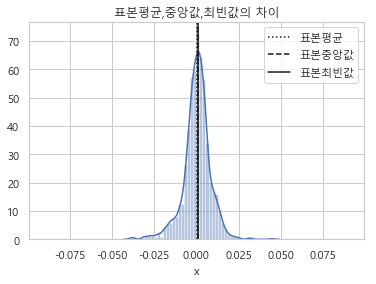

In [222]:
import pandas_datareader.data as web


df = web.DataReader("DJCA", data_source='fred').dropna()["DJCA"]
r = np.log(df / df.shift(1)).dropna().values
sample_statistics(r, 100, -0.09, 0.09)

In [225]:
#표평 #표분 #표편
np.mean(r), np.var(r, ddof = True), np.std(r,ddof = True)

(0.00032961741381284644, 6.423439458533692e-05, 0.008014636272803459)

In [226]:
str(round(np.std(r) * np.sqrt(256) * 100)) + '%'

'13.0%'

구간이 100개일 때
표본 평균이 -0.09051341498039077
표본 중앙값이 -0.11605606959925549
표본 최빈값이 -0.8100000000000005


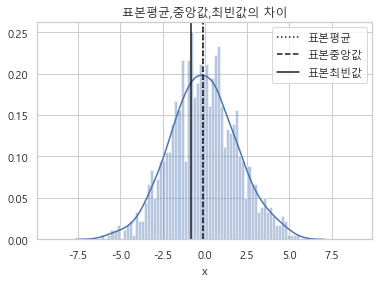

In [232]:
sp.random.seed(0)
x = sp.stats.norm(0, 2).rvs(1000)  # 평균=0, 표준편차=2 인 정규분포 데이터 생성
sample_statistics(x,100,-9,9)

In [233]:
sp.stats.skew(x), sp.stats.kurtosis(x)

(0.03385895323565712, -0.0467663244783294)

In [248]:
sp.stats.moment(x,2)

3.896937825248617

In [250]:
print(x)

[ 3.52810469e+00  8.00314417e-01  1.95747597e+00  4.48178640e+00
  3.73511598e+00 -1.95455576e+00  1.90017684e+00 -3.02714417e-01
 -2.06437704e-01  8.21197004e-01  2.88087142e-01  2.90854701e+00
  1.52207545e+00  2.43350033e-01  8.87726465e-01  6.67348655e-01
  2.98815815e+00 -4.10316528e-01  6.26135403e-01 -1.70819148e+00
 -5.10597963e+00  1.30723719e+00  1.72887240e+00 -1.48433004e+00
  4.53950925e+00 -2.90873135e+00  9.15170346e-02 -3.74367700e-01
  3.06555843e+00  2.93871754e+00  3.09894851e-01  7.56325039e-01
 -1.77557150e+00 -3.96159294e+00 -6.95824299e-01  3.12697938e-01
  2.46058136e+00  2.40475970e+00 -7.74653635e-01 -6.04605501e-01
 -2.09710593e+00 -2.84003587e+00 -3.41254038e+00  3.90155079e+00
 -1.01930436e+00 -8.76148603e-01 -2.50559072e+00  1.55498071e+00
 -3.22779570e+00 -4.25480560e-01 -1.79093312e+00  7.73804996e-01
 -1.02161028e+00 -2.36126437e+00 -5.63644567e-02  8.56663741e-01
  1.33034445e-01  6.04943795e-01 -1.26864419e+00 -7.25482332e-01
 -1.34492090e+00 -7.19106

In [1]:
a = 2

In [2]:
a+2

4